In [1]:
pwd

'/Users/mkbelay/Documents/PPOL 564/Data Science Project/PPOL-564-Data-Science-Project/Data Analysis'

In [2]:
##import packages to be used in this session
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [3]:
##import project csv file
df=pd.read_csv("COVID_project_PPOL564.csv")

In [4]:
##print shape
df.shape

(974, 31)

In [5]:
##view first 10 observations
df.head(10)

,fips,state,county,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,...,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,uninsured,exercise_opp,income_ineq,crime_violent
0,1001,AL,Autauga County,119,44,21,0,0,0,55869,...,0.748946,23.628395,7.2,2220.160000,0.0,11.7,0.111490,0.691301,5.234597,272.282220
1,1003,AL,Baldwin County,201,144,6,0,0,0,223234,...,0.736193,31.825343,8.0,1371.793548,0.0,10.3,0.143485,0.737135,4.417767,203.660396
2,1005,AL,Barbour County,91,5,32,0,0,0,24686,...,0.613978,23.449713,5.6,3158.750000,0.0,11.5,0.160858,0.531668,5.681410,414.277861
3,1007,AL,Bibb County,50,17,5,0,0,0,22394,...,0.750731,52.600206,7.8,2060.727273,0.0,11.2,0.130000,0.162514,4.368581,89.349126
4,1009,AL,Blount County,37,15,0,0,0,0,57826,...,0.786262,17.694495,8.4,4462.538462,0.0,11.7,0.170823,0.156345,4.430262,482.690611
5,1011,AL,Bullock County,125,0,106,0,0,0,10101,...,0.755334,30.618760,4.3,3436.333333,0.0,11.2,0.152410,0.025014,7.410196,311.027333
6,1013,AL,Butler County,263,65,166,0,0,0,19448,...,0.699463,37.511848,6.6,3965.000000,1.0,10.6,0.145058,0.485797,5.423596,581.584005
7,1015,AL,Calhoun County,124,72,23,0,0,0,113605,...,0.694735,40.681183,6.9,1571.616438,0.0,11.8,0.153887,0.477212,5.023896,756.066544
8,1017,AL,Chambers County,301,81,181,0,0,0,33254,...,0.677641,25.672844,6.4,2408.071429,0.0,11.4,0.152263,0.618647,4.744932,528.999736
9,1021,AL,Chilton County,65,27,0,0,0,0,44428,...,0.748493,33.224416,8.1,4896.333333,0.0,11.2,0.175047,0.462938,5.107668,507.810721


We'll start by examining the data types and making adjustments to prepare for visualization and take notes for high-level pre-processing.

In [6]:
##check data types
df.dtypes

fips                   int64
state                 object
county                object
cases                  int64
white_cases            int64
black_cases            int64
hispanic_cases         int64
native_cases           int64
asian_cases            int64
TOT_POP                int64
WH                     int64
BA                     int64
AA                     int64
IA                     int64
HI                     int64
GDP                  float64
pov_perc             float64
Med_inc               object
Unemployment Rate    float64
traffic_vol          float64
house_burden         float64
ownership            float64
residential_seg      float64
food_index           float64
pop_to_phys          float64
water_violation      float64
air_pollution        float64
uninsured            float64
exercise_opp         float64
income_ineq          float64
crime_violent        float64
dtype: object

Let's convert 'Med_inc'(median household income) to a numeric data type as it is currently object/string data type. Let's also convert 'water_violation' to a categorical data type: this is a binary variable which takes on a value of either 0 or 1 to indicate if a water violation has been reported in the county. 

In [7]:
## remove commas from Med_inc column
df['Med_inc']=df['Med_inc'].str.replace(",","")
##change 'Med_inc' to dtype integer
df['Med_inc']=df['Med_inc'].astype('int')

In [8]:
## change 'water_violation' to dtype category
df['water_violation']=df['water_violation'].astype('category')

Now, we'll look at missingness in our data. This will determine if observations need to be removed; if imputation needs to be considered; or if observations need to be subsetted. 

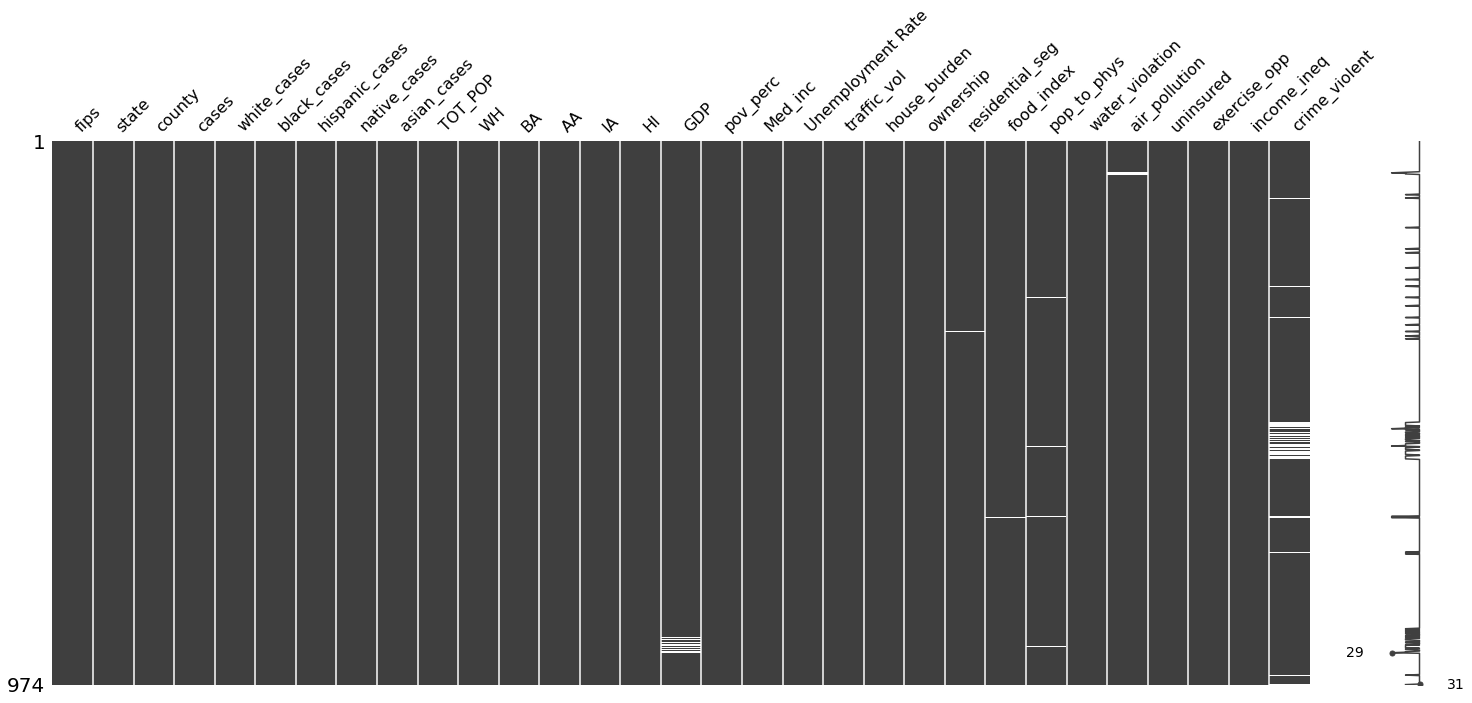

In [9]:
## examine missingness 
miss.matrix(df) 

Looking at the plot above, a couple of the feature variables stand out as having missing values: 'GDP' and 'crime_violent' seem to having the most missing observations, closely followed by 'residential_seg','food_index','pop_to_phys','water_violation', and 'air_pollution'. Next, a numeric description of missingness will be generated to see the extent of missingness and determine how best to deal with missing values. 

In [10]:
##numeric visualization of missingness 
df.isnull().sum()

fips                  0
state                 0
county                0
cases                 0
white_cases           0
black_cases           0
hispanic_cases        0
native_cases          0
asian_cases           0
TOT_POP               0
WH                    0
BA                    0
AA                    0
IA                    0
HI                    0
GDP                  19
pov_perc              0
Med_inc               0
Unemployment Rate     0
traffic_vol           0
house_burden          0
ownership             0
residential_seg       2
food_index            4
pop_to_phys           9
water_violation       1
air_pollution         4
uninsured             0
exercise_opp          0
income_ineq           0
crime_violent        56
dtype: int64

The variable 'crime_violent' has the largest number of missing values. The number of violent crimes in a county does directly and indirectly affect the health of a community. However, the other features in this dataframe are highly correlated with violent crime--for instance, reasearch has shown that firearm homicide rates are higher in U.S counties with greater income inequality(https://epi.washington.edu/news/firearm-homicide-rate-higher-us-counties-greater-income-inequality). Additionally, given that this dataset is not that large with just 974 observations, removing 56 observations would be too costly.Therefore, this variable will be excluded from the first attempt at building a predictive model but will be considered for future iterations.  

The other feature variables with missing values are not as obviously correlated with the feature variables without missing values. These feature variables are also important social and environmental factors with immense implications on health. Therefore, these variables will be included in the analysis. For the first attempt at building a predictive model, observations missing values for these feature variables will be removed.

In [11]:
##create modified dataframe ; remove crime_violent column 
df2=df.drop(columns=['crime_violent'])

In [12]:
## remove observations with NAs for all feature variabels 
df2= df2.dropna()

In [13]:
##double check missingness 
df2.isnull().sum()

fips                 0
state                0
county               0
cases                0
white_cases          0
black_cases          0
hispanic_cases       0
native_cases         0
asian_cases          0
TOT_POP              0
WH                   0
BA                   0
AA                   0
IA                   0
HI                   0
GDP                  0
pov_perc             0
Med_inc              0
Unemployment Rate    0
traffic_vol          0
house_burden         0
ownership            0
residential_seg      0
food_index           0
pop_to_phys          0
water_violation      0
air_pollution        0
uninsured            0
exercise_opp         0
income_ineq          0
dtype: int64

In [14]:
##view dataframe
df2.shape

(936, 30)

Before we begin exploring this data, we need to split it into a training and test dataset. Since the outcome variable has not been generated just yet, we will start by creating the outcome variable, then the data will be split into training and test.

### Step 1: Create Outcome Variable
The goal of this project is to examine the factors that lead to racial and ethnic health disparities among racial and ethnic minority population in COVID-19 cases. The outcome variable will be generated by: 
1. Calculating the COVID-19 percentage share by race and ethnicity for each county
2. Calculating the racial/ethnic distribution of populations for each county
3. Subtracting the COVID-19 case percentage from the population percentage for each race/ethnicity in each county. If the value is positive, it is indicative of a disparity in COVID-19 cases for that race/ethnicity; if the value is equal to 0, the COVID-19 cases for that race/ethnicity is the same as their population; lastly, if the value is negative, the COVID-19 cases for that race/ethnicity is less than their share of the population. This disparity metric calculation was taken from the CDC: https://www.cdc.gov/nchs/nvss/vsrr/covid19/health_disparities.htm. Note: unlike the CDC metric, the outcome variable for all ethnic/racial minorities will be one. That is, the COVID-19 cases and county population for black, hispanic, native american, and asian persons will be summed together to create this metric.

#### 1. Calculating the COVID-19 percentage share by race and ethnicity for each county

In [15]:
##sum COVID cases count for black, hispanic, native american, and asian 
df2['cases_min_pop']=df2['black_cases']+df2['hispanic_cases']+df2['native_cases']+df2['asian_cases']
##calculate percentage share of total cases
df2['cases_min_pop']=df2['cases_min_pop']/df2['cases']

#### 2. Calculating the racial/ethnic distribution of populations for each county

In [16]:
## sum population count for black, hispanic, native american, and asian 
df2['min_pop']=df2['BA']+df2['AA']+df2['IA']+df2['HI']
##calculate percentage out of total population
df2['min_pop']=df2['min_pop']/df2['TOT_POP']

#### 3. Subtracting the COVID-19 case percentage from the population percentage for each race/ethnicity in each county.

In [17]:
##create disparity index
df2['disp_index']=df2['cases_min_pop']-df2['min_pop']
##multiply by 100
df2['disp_index'] = df2['disp_index'].apply(lambda x: x*100)

In [18]:
##check dtype
df2.disp_index.dtypes

dtype('float64')

### Step 2: Separate into training and test data sets

In [19]:
## isolate outcome from features
y = df2[['disp_index']]
X = df2.drop(columns=['disp_index'])

In [20]:
## split in to training (75% of data) and test (25% of data); set random state to replicate same split every time
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [21]:
##check shape to confirm split
print(train_X.shape[0]/df2.shape[0])
print(test_X.shape[0]/df2.shape[0])

0.75
0.25


### Step 3: Explore training dataset

In [22]:
##view first 20 observations
train_X

,fips,state,county,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,...,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,uninsured,exercise_opp,income_ineq,cases_min_pop,min_pop
960,55101,WI,Racine County,1601,435,482,544,0,0,196311,...,47.243230,8.1,2108.290323,1.0,11.7,0.072543,0.933457,4.395034,0.640849,0.276413
634,36095,NY,Schoharie County,53,19,0,0,0,0,30999,...,18.513829,8.1,3927.500000,0.0,7.5,0.059946,0.493908,4.354296,0.000000,0.060615
233,13313,GA,Whitfield County,235,17,0,92,0,0,104628,...,31.486836,8.1,1868.892857,0.0,10.9,0.288152,0.670318,4.098933,0.391489,0.438009
161,12087,FL,Monroe County,52,17,0,0,0,0,74228,...,42.394936,7.8,1305.305085,0.0,8.0,0.222888,1.000000,4.491335,0.000000,0.343859
710,37179,NC,Union County,405,175,41,80,0,0,239859,...,25.959608,8.6,1522.144737,1.0,10.9,0.132859,0.650080,4.131002,0.298765,0.282403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,8003,CO,Alamosa County,47,7,0,6,0,0,16233,...,10.418814,8.2,1273.153846,1.0,4.6,0.160188,0.831272,5.203702,0.127660,0.565453
331,19169,IA,Story County,53,29,0,0,0,0,97117,...,35.057191,7.0,1477.303030,0.0,9.3,0.059939,0.931362,5.692828,0.000000,0.151899
393,23019,ME,Penobscot County,81,36,0,0,0,0,152148,...,38.596017,7.5,775.290816,1.0,7.2,0.128646,0.634122,4.930179,0.000000,0.049682
376,21093,KY,Hardin County,66,30,0,0,0,0,110958,...,34.045736,7.2,1589.279412,0.0,11.8,0.058336,0.547265,4.293367,0.000000,0.212260


In [23]:
train_X.columns

Index(['fips', 'state', 'county', 'cases', 'white_cases', 'black_cases',
       'hispanic_cases', 'native_cases', 'asian_cases', 'TOT_POP', 'WH', 'BA',
       'AA', 'IA', 'HI', 'GDP', 'pov_perc', 'Med_inc', 'Unemployment Rate',
       'traffic_vol', 'house_burden', 'ownership', 'residential_seg',
       'food_index', 'pop_to_phys', 'water_violation', 'air_pollution',
       'uninsured', 'exercise_opp', 'income_ineq', 'cases_min_pop', 'min_pop'],
      dtype='object')

__What is the distribution of the feature variables?__

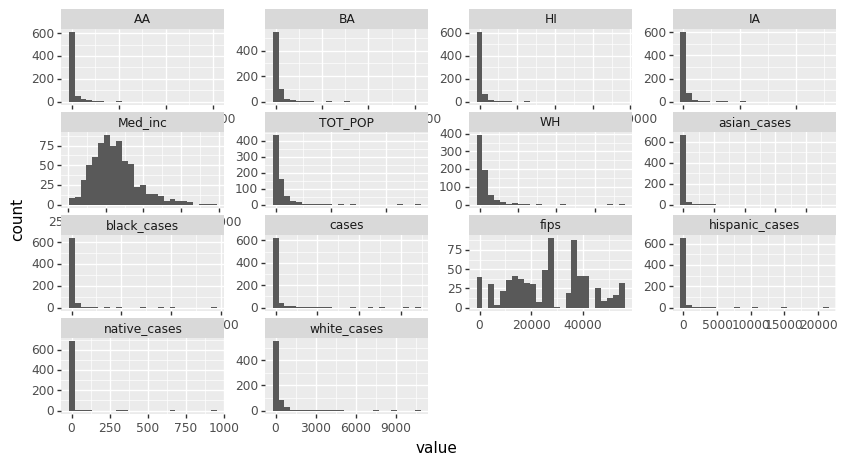

<ggplot: (8781835090309)>

In [24]:
## view continous int variables
d = train_X.select_dtypes(include="int").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

The 'fips' variable will not be included in the model. Apart from the median income variable ('Med_inc'), the rest of the variables have a right skew. These variables represent a county's population and a county's COVID-19 cases by racial and ethnic groups. Let's log these variables and see how their distribution changes

In [25]:
train_X.TOT_POP.sort_values()

354       4033
571       4736
185       6189
223       6778
552       6792
        ...   
926    2252782
627    2253858
160    2716940
64     4485414
253    5150233
Name: TOT_POP, Length: 702, dtype: int64

In [26]:
##log variables
d = train_X.copy()
d['ln_AA'] =  np.log(d['AA'] + 1)## add 1 to avoid loggin 0s
d['ln_BA'] =  np.log(d['BA'] + 1)## add 1 to avoid loggin 0s
d['ln_IA'] =  np.log(d['IA'] + 1)## add 1 to avoid loggin 0s
d['ln_HI'] =  np.log(d['HI'] + 1)## add 1 to avoid loggin 0s
d['ln_WH'] =  np.log(d['WH'] + 1)## add 1 to avoid loggin 0s
d['ln_TOT_POP'] =  np.log(d['TOT_POP'] + 1)## add 1 to avoid loggin 0s
d['ln_cases'] =  np.log(d['cases'] + 1)## add 1 to avoid loggin 0s
d['ln_AAcases'] =  np.log(d['asian_cases'] + 1)## add 1 to avoid loggin 0s
d['ln_BAcases'] =  np.log(d['black_cases'] + 1)## add 1 to avoid loggin 0s
d['ln_IAcases'] =  np.log(d['native_cases'] + 1)## add 1 to avoid loggin 0s
d['ln_HIcases'] =  np.log(d['hispanic_cases'] + 1)## add 1 to avoid loggin 0s
d['ln_WHcases'] =  np.log(d['white_cases'] + 1)## add 1 to avoid loggin 0s


In [27]:
##keep only logged variables
d=d.loc[:, d.columns.str.startswith('ln')]
##transform from wide to long for visualization
d=d.melt()

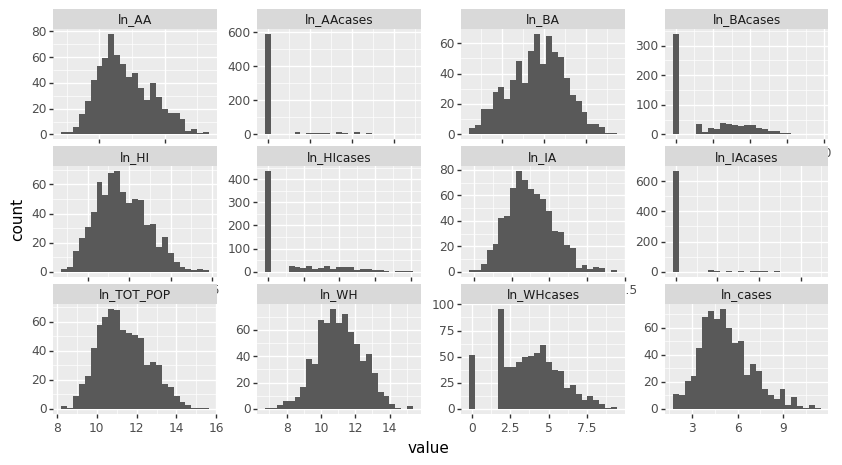

<ggplot: (8781834438533)>

In [28]:
##visualize
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

While logging seems to have normalized the distribution of the population variables, the racial and ethnic breakdown of COVID-19 cases has not normalized. While turning these variables into categories is an option, it would mean loosing information. Given that this data set is lacking in size and representation due to reporting inconsistencies, it would be best to keep the variables as is for the the first attempt at the model. Next, let us visualize the continious variables with dtype=float.

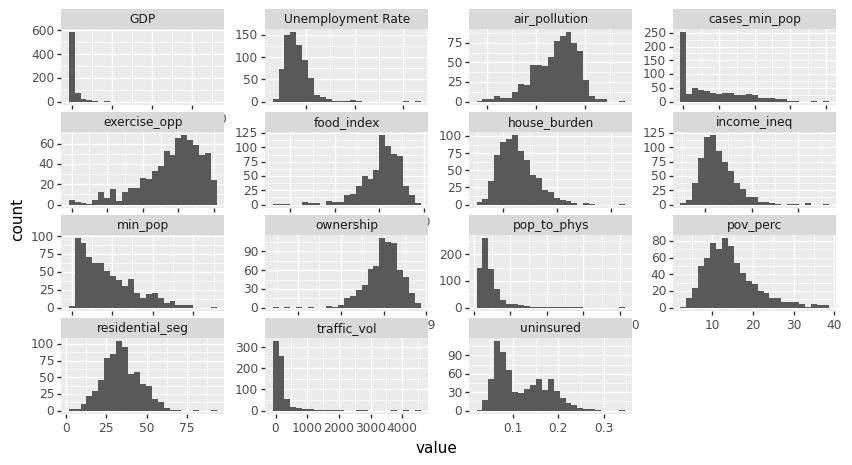

<ggplot: (8781835132561)>

In [29]:
## view continious float variables
e = train_X.select_dtypes(include="float").melt()
(
    ggplot(e,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

The variables min_pop and cases_min_pop will not be included in the model since they were generated to create the outcome variable. GDP, Unemployment Rate, ownership, pop_to_phys, and traffic volume seem to have a pronounced skew. Let us log these variables and see how they look: 
    

In [30]:
##log variables
d = train_X.copy()
d['ln_GDP'] =  np.log(d['GDP'] + 1)## add 1 to avoid loggin 0s
d['ln_Unemployment Rate'] =  np.log(d['Unemployment Rate'] + 1)## add 1 to avoid loggin 0s
d['ln_ownership'] =  np.log(d['ownership'] + 1)## add 1 to avoid loggin 0s
d['ln_pop_to_phys'] =  np.log(d['pop_to_phys'] + 1)## add 1 to avoid loggin 0s
d['ln_traffic_vol'] =  np.log(d['traffic_vol'] + 1)## add 1 to avoid loggin 0s

In [31]:
##keep only logged variables
d=d.loc[:, d.columns.str.startswith('ln')]
##transform from wide to long for visualization
d=d.melt()

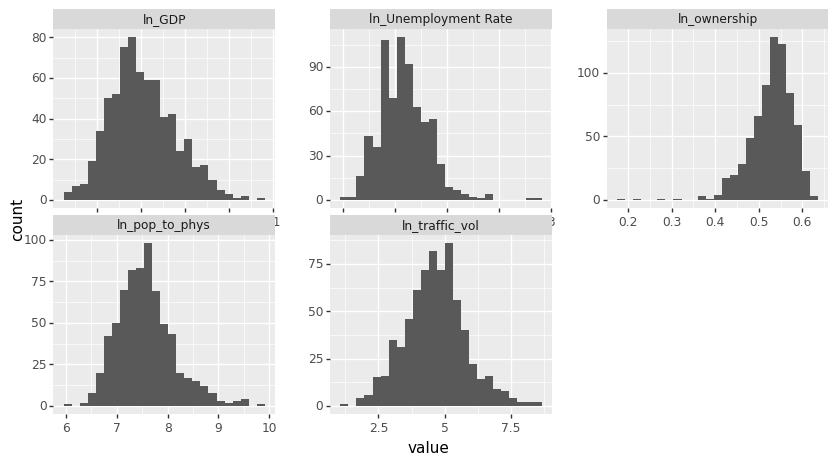

<ggplot: (8781834360167)>

In [32]:
##visualize
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

Logging seems to have normalized most of the variables, however, the variable 'ownership', which indicates the percentage of occupied households that are owned, has not benefitted from logging. Since we want to maintain as much information as possible, this variable will be left as is in its logged form for now.

Now let us look at the distribution of the only categorical variable. Based on the data source, "1 means “Yes” and indicates that at least one community water system in the county received at least one health-based violation during the specified time frame. 0 means “No” and indicates that there were no health-based drinking water violations in any community drinking water system in the county."https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-factors/physical-environment/air-water-quality/drinking-water-violations



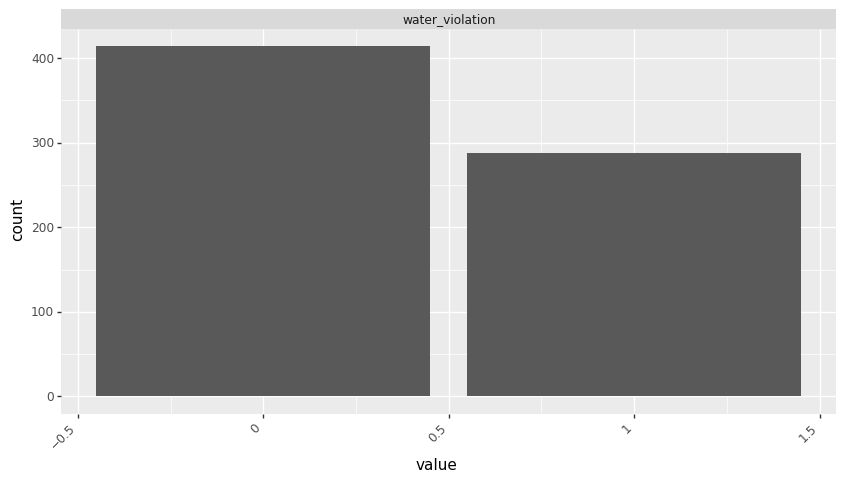

<ggplot: (8781834138356)>

In [33]:
##categorical variables
f = train_X.select_dtypes(include="category").melt()
(
    ggplot(f,aes(x="value")) +
    geom_bar() +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
         axis_text_x=element_text(rotation=45, hjust=1))
)

Majority of the counties in the training data set have not recieved a health-based drinking water violation in 2018. Conversely, over 200 counties have recieved a  health-based drinking water violation in 2018.

__What is the distribution of the outcome variable?__

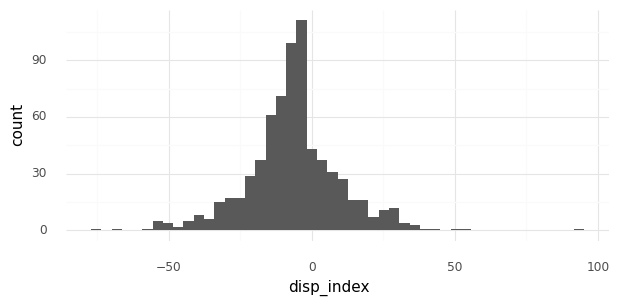

<ggplot: (8781834335419)>

In [34]:
##distribution of outcome variable
(
    ggplot(train_y,
           aes(x="disp_index")) +
    geom_histogram() +
    theme_minimal() +
    theme(figure_size = (7,3)) 
)

It appears that, for majority of the counties represented in the training data set, the disparity index has a value less than zero, which means that racial and ethnic disparities in COVID-19 cases are not present (based on comparison of each groups share of population and share of COVID-19 cases).

Let's see how the feature variables relate to the outcome variable

In [35]:
##D = train_X.copy()
##D['disp_index'] = train_y

##(
    ##ggplot(D.melt(id_vars=["disp_index"]),
  ##         aes(x="value",y="disp_index"))+
  ##  geom_point(alpha=.5) +
    ##facet_wrap("variable",scales="free") +
   ## theme_minimal() +
   ## theme(figure_size = (10,5)) 
#)##

### Step 4:  High-level preprocessing

#### `AA`

In [36]:
df2['AA'] =  np.log(df2['AA'] + 1)## add 1 to avoid logging 0s

In [37]:
df2['BA'] =  np.log(df2['BA'] + 1)## add 1 to avoid logging 0s

In [38]:
df2['IA'] =  np.log(df2['IA'] + 1)## add 1 to avoid logging 0s

In [39]:
df2['HI'] =  np.log(df2['HI'] + 1)## add 1 to avoid logging 0s

In [40]:
df2['WH'] =  np.log(df2['WH'] + 1)## add 1 to avoid logging 0s

In [41]:
df2['TOT_POP'] =  np.log(df2['TOT_POP'] + 1)## add 1 to avoid logging 0s

In [42]:
df2['cases'] =  np.log(df2['cases'] + 1)## add 1 to avoid logging 0s

In [43]:
df2['asian_cases'] =  np.log(df2['asian_cases'] + 1)## add 1 to avoid logging 0s

In [44]:
df2['black_cases'] =  np.log(df2['black_cases'] + 1)## add 1 to avoid logging 0s

In [45]:
df2['native_cases'] =  np.log(df2['native_cases'] + 1)## add 1 to avoid logging 0s

In [46]:
df2['hispanic_cases'] =  np.log(df2['hispanic_cases'] + 1)## add 1 to avoid logging 0s

In [47]:
df2['white_cases'] =  np.log(df2['white_cases'] + 1)## add 1 to avoid logging 0s

In [48]:
df2['GDP'] =  np.log(df2['GDP'] + 1)## add 1 to avoid loggin 0s
df2['Unemployment Rate'] =  np.log(df2['Unemployment Rate'] + 1)## add 1 to avoid loggin 0s
df2['ownership'] =  np.log(df2['ownership'] + 1)## add 1 to avoid loggin 0s
df2['pop_to_phys'] =  np.log(df2['pop_to_phys'] + 1)## add 1 to avoid loggin 0s
df2['traffic_vol'] =  np.log(df2['traffic_vol'] + 1)## add 1 to avoid loggin 0s

### Step 5: Resplit data

In [49]:
df2.columns

Index(['fips', 'state', 'county', 'cases', 'white_cases', 'black_cases',
       'hispanic_cases', 'native_cases', 'asian_cases', 'TOT_POP', 'WH', 'BA',
       'AA', 'IA', 'HI', 'GDP', 'pov_perc', 'Med_inc', 'Unemployment Rate',
       'traffic_vol', 'house_burden', 'ownership', 'residential_seg',
       'food_index', 'pop_to_phys', 'water_violation', 'air_pollution',
       'uninsured', 'exercise_opp', 'income_ineq', 'cases_min_pop', 'min_pop',
       'disp_index'],
      dtype='object')

In [50]:
y = df2[['disp_index']]
X = df2.drop(columns=['disp_index','fips','state','county','cases_min_pop','min_pop' ])

In [51]:
## split in to training (75% of data) and test (25% of data); set random state to replicate same split every time
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [52]:
##check shape to confirm split
print(train_X.shape[0]/df2.shape[0])
print(test_X.shape[0]/df2.shape[0])

0.75
0.25


### Step 6:  Pre-Processing

Let's rescale our training data for now, but we'll put the preprocessing into a modeling pipeline later on.

In [53]:
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [54]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,WH,BA,AA,...,house_burden,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,uninsured,exercise_opp,income_ineq
0,0.598569,0.655437,0.645696,0.632611,0.0,0.0,0.543194,0.623267,0.612924,0.500649,...,0.300735,0.764933,0.509286,0.8250,0.410876,1.0,0.715517,0.145675,0.933457,0.215057
1,0.235392,0.323072,0.000000,0.000000,0.0,0.0,0.285126,0.417217,0.233193,0.281219,...,0.245681,0.858754,0.182761,0.8250,0.574178,0.0,0.353448,0.105534,0.493908,0.208411
2,0.393394,0.311709,0.000000,0.455082,0.0,0.0,0.455208,0.557408,0.453235,0.462554,...,0.201076,0.700121,0.330206,0.8250,0.379242,0.0,0.646552,0.832700,0.670318,0.166752
3,0.233389,0.311709,0.000000,0.000000,0.0,0.0,0.407212,0.513853,0.466099,0.420395,...,0.644857,0.651216,0.454182,0.7875,0.285059,0.0,0.396552,0.624740,1.000000,0.230767
4,0.451515,0.557605,0.390517,0.441211,0.0,0.0,0.571207,0.644186,0.636841,0.610941,...,0.165169,0.929188,0.267386,0.8875,0.325385,1.0,0.646552,0.337869,0.650080,0.171983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.222773,0.224255,0.000000,0.195373,0.0,0.0,0.194679,0.328449,0.185428,0.293499,...,0.301525,0.595559,0.090756,0.8375,0.278515,1.0,0.103448,0.424950,0.831272,0.346980
698,0.235392,0.366799,0.000000,0.000000,0.0,0.0,0.444792,0.543008,0.411537,0.602388,...,0.529997,0.552388,0.370785,0.6875,0.317539,0.0,0.508621,0.105513,0.931362,0.426775
699,0.280144,0.389416,0.000000,0.000000,0.0,0.0,0.507562,0.607915,0.342950,0.468845,...,0.298247,0.789784,0.411005,0.7500,0.148402,1.0,0.327586,0.324443,0.634122,0.302359
700,0.258501,0.370335,0.000000,0.000000,0.0,0.0,0.463421,0.550235,0.562364,0.496985,...,0.224243,0.685236,0.359289,0.7125,0.336711,0.0,0.724138,0.100404,0.547265,0.198471


### Step 6: Modeling

We have a continuously distributed outcome variable i.e., a regression problem.Let's test how these models perform

- Linear Regression 
- KNN
- Decision Trees
- Bagging 
- Random Forest

In [55]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

Let's run each model individually then compare the performance of the different models in a plot.

We'll use **mean squared error** as our performance metrics.

In [56]:
use_metrics = ["neg_mean_squared_error"]

### Linear Model

In [57]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

### KNN

In [58]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

### Decision Tree

In [59]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

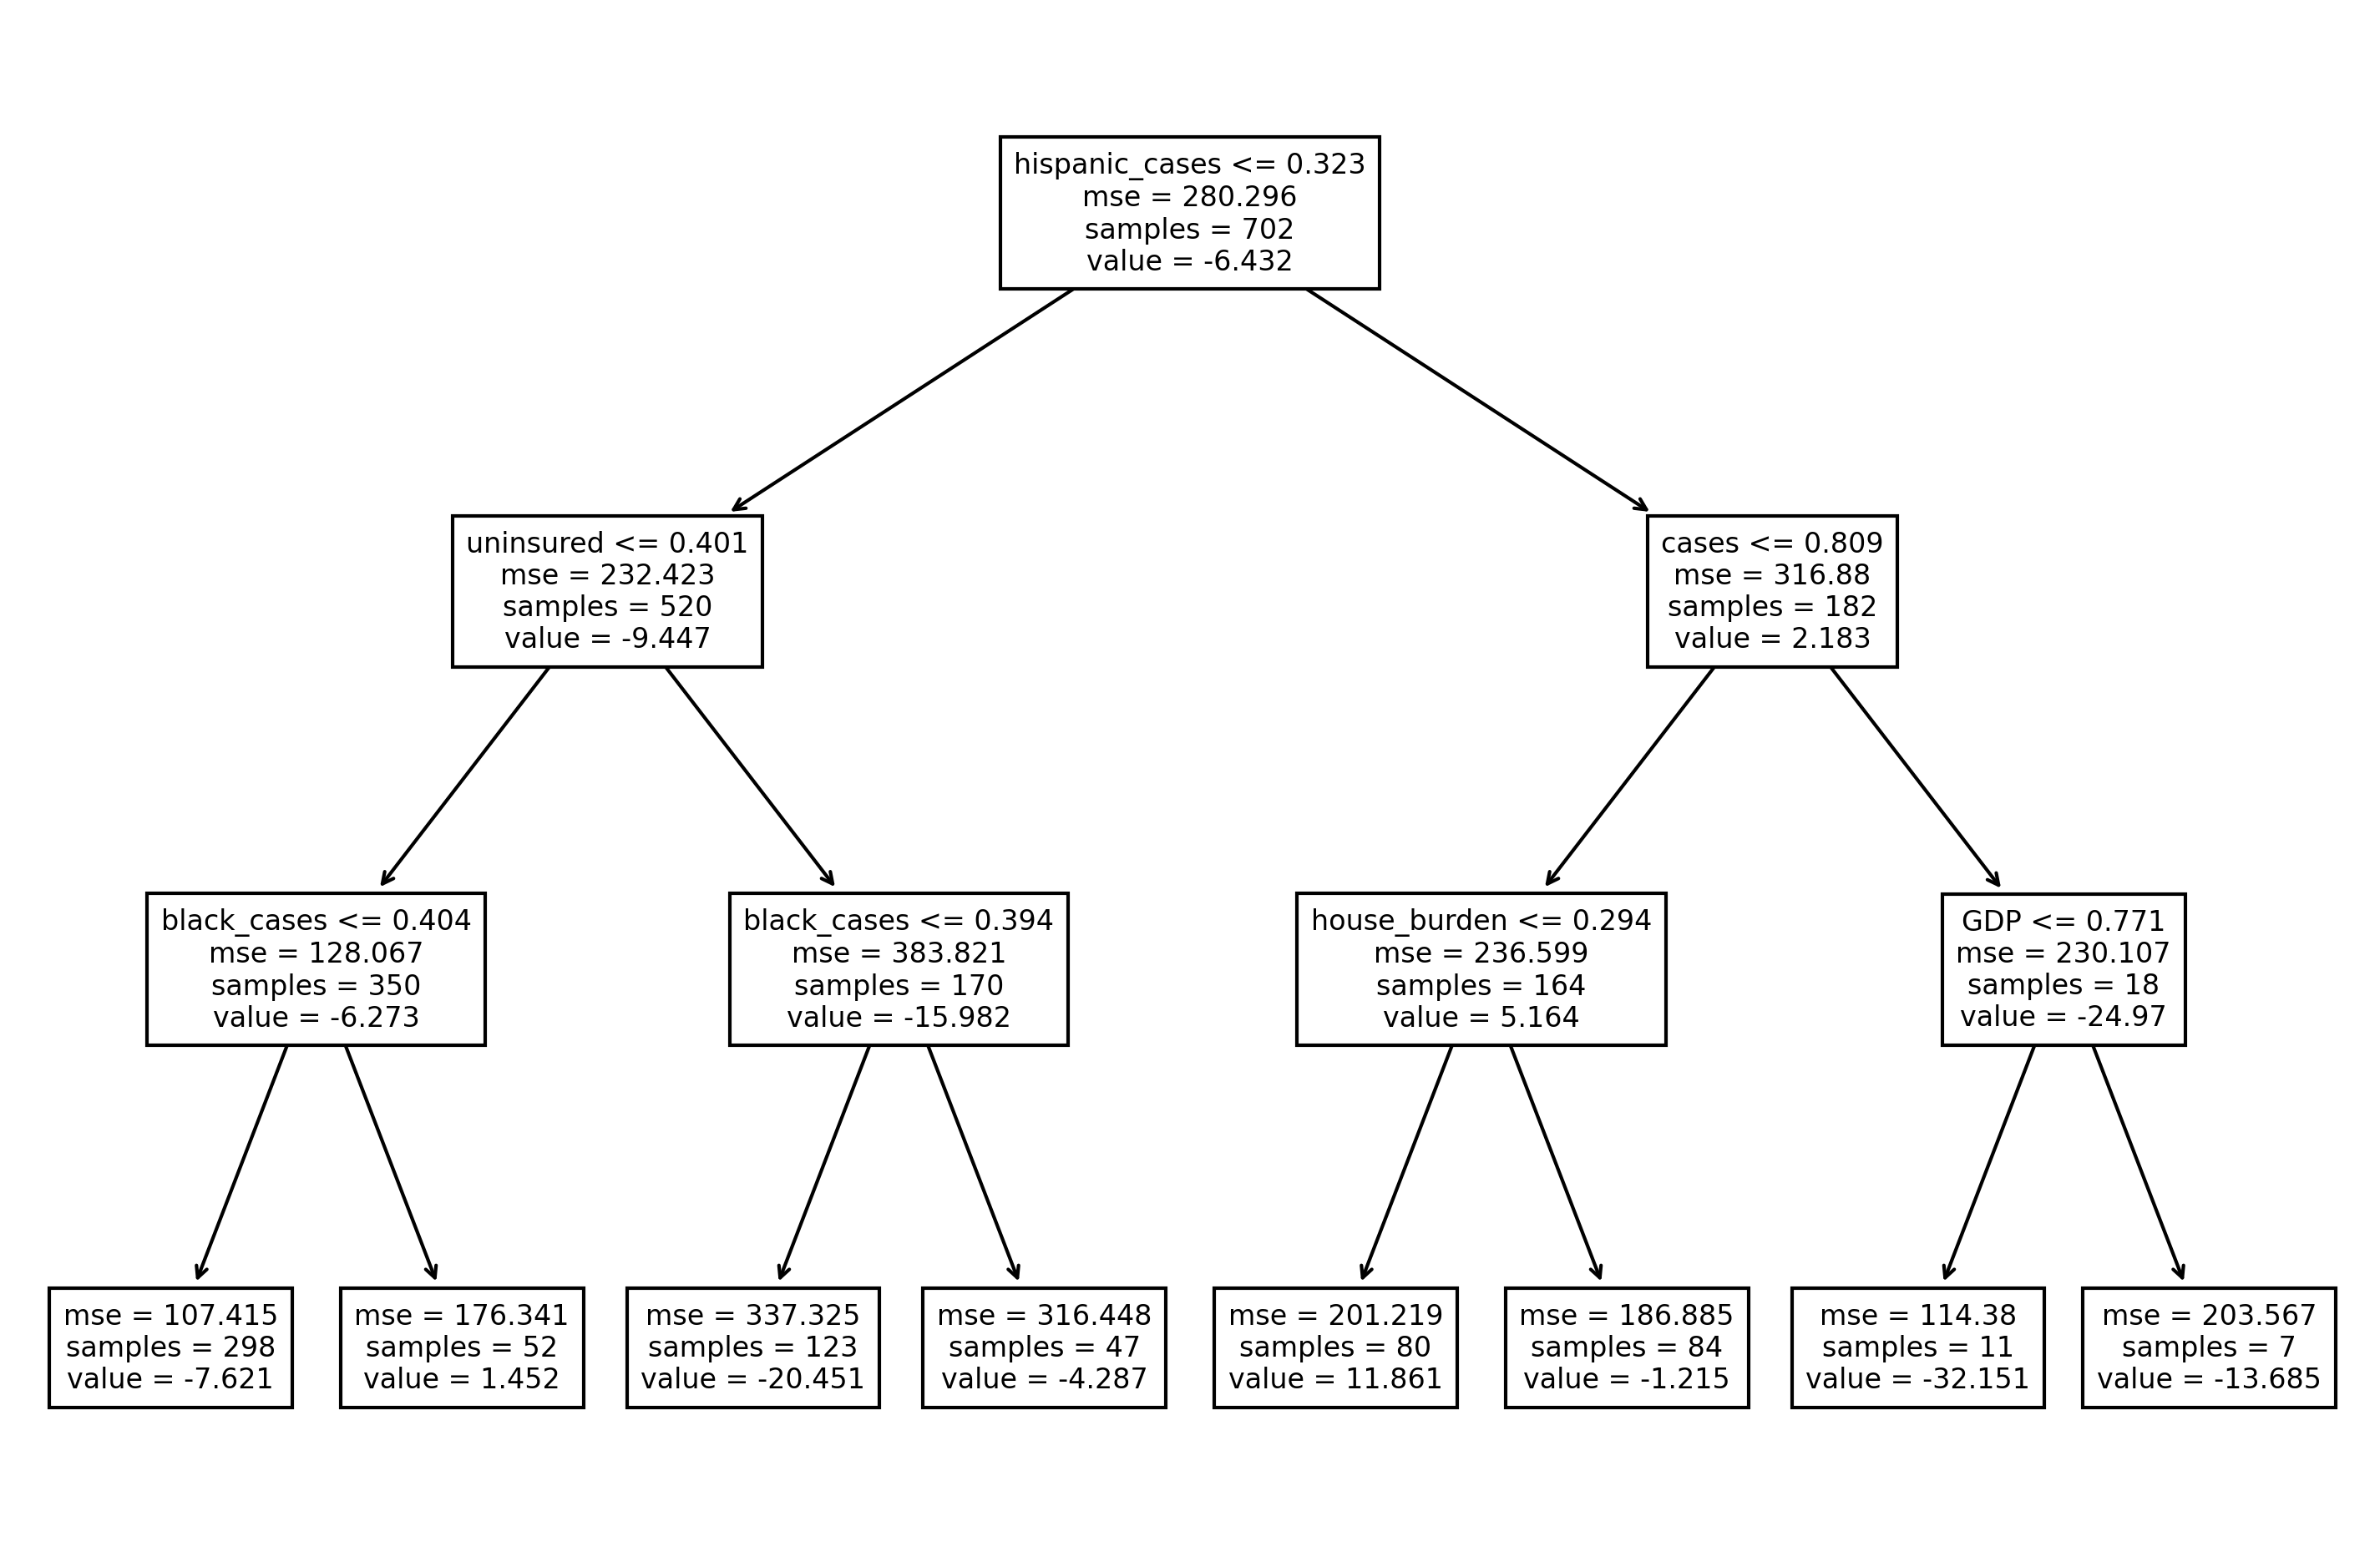

In [60]:
mod = DTree(max_depth=3) # Initialize the modeling object 
mod.fit(train_X,train_y) # Fit the model

# Plot the tree
plt.figure(figsize=(12,8),dpi=300)
rules = tree.plot_tree(mod,feature_names = col_names,fontsize=8)

### Bagging

In [61]:
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

### Random Forest

In [62]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [63]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,180.910269
1,lm,247.605010
2,lm,171.787165
3,lm,131.678018
4,lm,145.271667
5,knn,184.507478
6,knn,318.170830
7,knn,174.977838
8,knn,143.467832
9,knn,192.934203


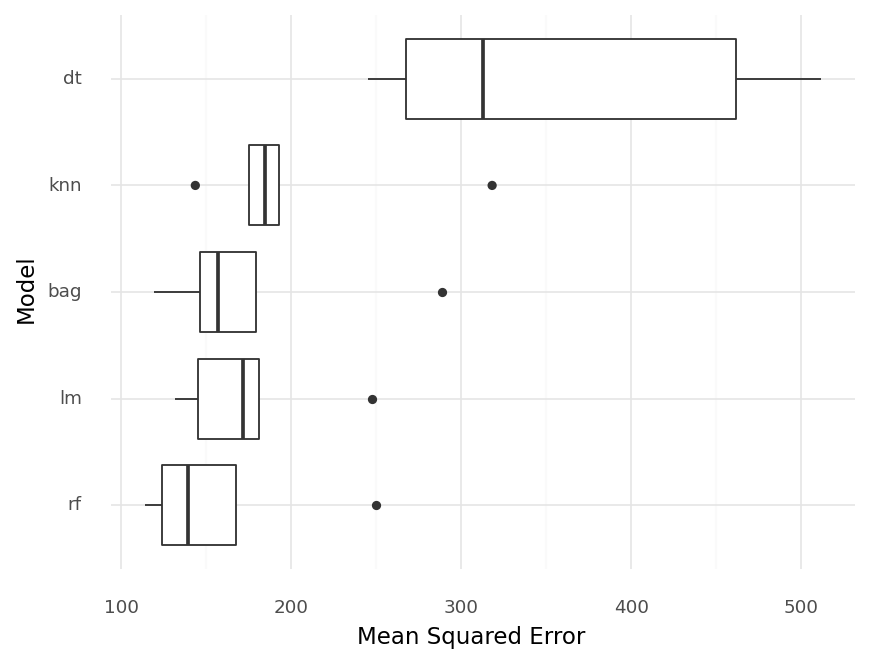

<ggplot: (8781837263993)>

In [64]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

In [65]:
rf_params = {'max_depth':[1,2,3,6],
             'n_estimators':[100,500,1000],
              'max_features': [17]} # Only have three total. 
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [66]:
tune_rf.fit(train_X,train_y) 

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 6], 'max_features': [17],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [67]:
tune_rf.best_params_

{'max_depth': 6, 'max_features': 17, 'n_estimators': 1000}

In [68]:
tune_rf.best_score_

-173.51941508815952

In [69]:
train_X.columns

Index(['cases', 'white_cases', 'black_cases', 'hispanic_cases', 'native_cases',
       'asian_cases', 'TOT_POP', 'WH', 'BA', 'AA', 'IA', 'HI', 'GDP',
       'pov_perc', 'Med_inc', 'Unemployment Rate', 'traffic_vol',
       'house_burden', 'ownership', 'residential_seg', 'food_index',
       'pop_to_phys', 'water_violation', 'air_pollution', 'uninsured',
       'exercise_opp', 'income_ineq'],
      dtype='object')

In [70]:
# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=123)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['cases', 'white_cases', 'black_cases', 'hispanic_cases', 'native_cases',
       'asian_cases', 'TOT_POP', 'WH', 'BA', 'AA', 'IA', 'HI', 'GDP',
       'pov_perc', 'Med_inc', 'Unemployment Rate', 'traffic_vol',
       'house_burden', 'ownership', 'residential_seg', 'food_index',
       'pop_to_phys', 'water_violation', 'air_pollution', 'uninsured',
       'exercise_opp', 'income_ineq'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['cases',
                                                                          'white_cases',
                                                                          'black_cases',
                                                                          'hispanic_cases',
                                                                          'native_cases',
                                                                          'asian_cases',
                                                                          'TOT_POP',
                                                                          'WH',
            

In [71]:
search.best_score_

-153.6803078906592

In [72]:
search.best_params_

{'model': RandomForestRegressor()}

In [136]:
rf_mod = search.best_estimator_

In [79]:
pred_y = search.predict(train_X)

In [80]:
m.mean_squared_error(train_y,pred_y)

20.425316736326415

In [81]:
m.r2_score(train_y,pred_y)

0.9290171933849409

In [82]:
pred_y

array([ -6.76525005,  -9.27081586,  12.65560998,  -0.43157954,
         3.9145878 , -14.36901495,  -0.67250281,  -6.44251733,
         9.13026761,  11.31576669, -14.27614042, -15.75196309,
        13.76446662,  -7.53695934,  -5.82885557, -15.0115163 ,
        10.73311357, -21.124638  ,  12.81238036,  -7.42356122,
       -43.19713489,  -4.47775903,   8.01920079, -11.46593228,
       -10.78987714,  -1.66386983,  19.32207827,  -7.09364289,
        -7.79896095,  -8.91446935,  -0.1028339 ,  12.50807343,
        -5.581293  ,  -9.24538206, -10.15317463, -28.80473403,
        -6.12371918, -34.39550557, -18.83257408, -14.33391604,
        -4.23300336, -10.15335009, -15.38039768,  -7.56108112,
        -6.22428231, -27.02695591,  -1.08879412, -19.14825745,
        25.91566567,  -3.04632638,  -2.58618393,  -5.34422283,
        -8.60050566,  -6.05954005,  -3.3164592 ,  -1.99344708,
         2.76680729, -12.35699071,  14.39213636,  26.31556121,
        -2.57600948,  -1.94635591, -42.35444861, -34.28

In [83]:
train_y

,disp_index
606,-6.754959
945,-8.813524
783,17.915149
483,-7.005126
465,6.044106
...,...
666,22.395689
845,-11.366975
833,12.431517
579,-26.517146


In [86]:
pred_y=pd.DataFrame(pred_y)

In [87]:
pred_y

,0
0,-6.765250
1,-9.270816
2,12.655610
3,-0.431580
4,3.914588
...,...
697,19.013139
698,-12.488725
699,11.195953
700,-26.883473


In [88]:
pred_y.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
df = pd.concat([pred_y, train_y], axis=1)

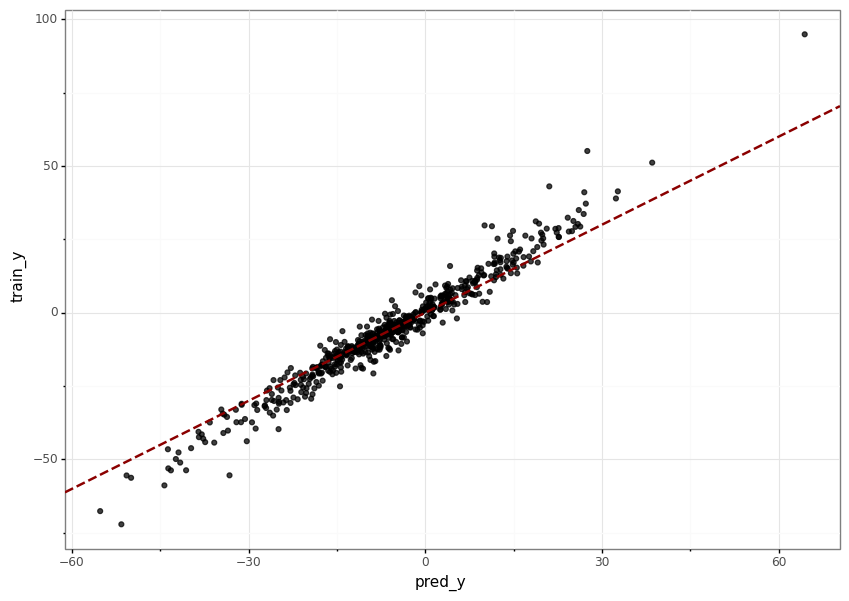

<ggplot: (8781834370874)>

In [89]:
(
    ggplot(df,aes(x='pred_y',y="train_y")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

In [140]:
from sklearn.inspection import permutation_importance

In [157]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=50)

In [158]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,hispanic_cases,0.782133,0.052947,0.676239,0.888027
1,black_cases,0.592779,0.037998,0.516783,0.668776
2,uninsured,0.230429,0.020692,0.189045,0.271813
3,BA,0.163488,0.009156,0.145176,0.181800
4,HI,0.123076,0.005535,0.112005,0.134147
5,house_burden,0.119936,0.010153,0.099631,0.140242
6,cases,0.065022,0.004552,0.055918,0.074127
7,asian_cases,0.054454,0.006673,0.041107,0.067801
8,ownership,0.044342,0.004412,0.035517,0.053167
9,white_cases,0.042776,0.003634,0.035508,0.050045


In [154]:
vi_dat['vi'].sum()

2.447684012927729

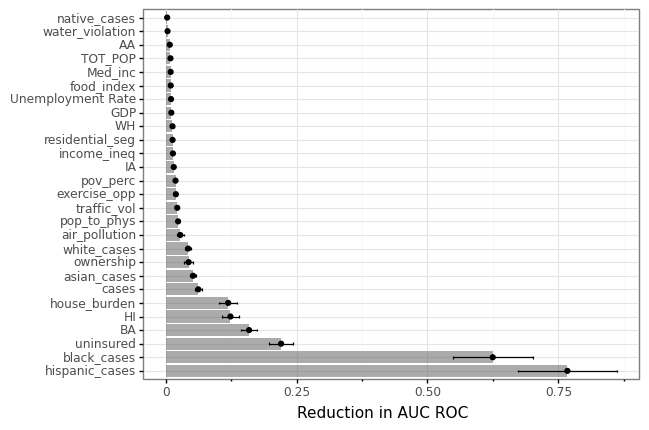

<ggplot: (8772687602170)>

In [143]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [150]:
from pdpbox import pdp

In [151]:
pdp_dist = pdp.pdp_isolate(model = rf_mod, 
                           dataset = train_X,
                           model_features = train_X.columns.tolist(),
                           feature="uninsured")

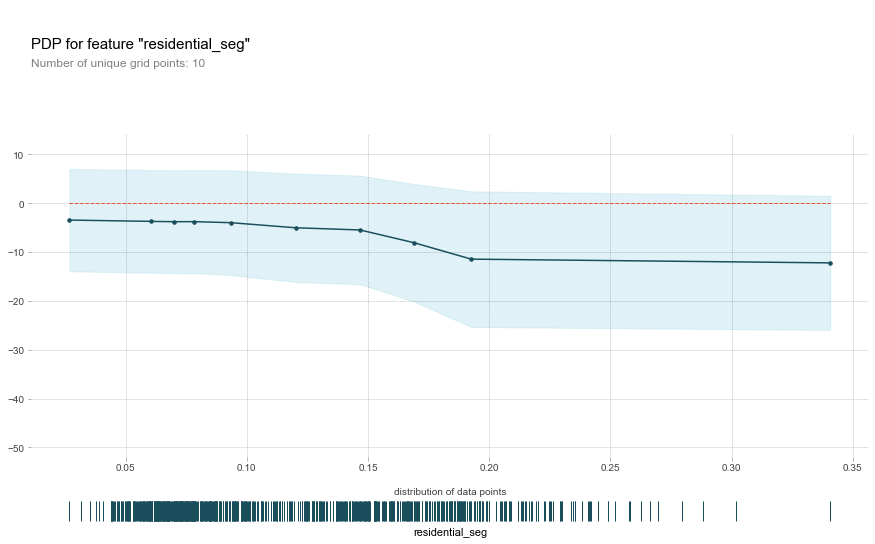

In [153]:
fig,ax = pdp.pdp_plot(pdp_dist,'residential_seg',plot_pts_dist=True,center=False,)